In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('/Users/rugved/Desktop/tawde project/content/creditcard.csv')

# Feature standardization
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

In [ ]:
# Random undersampling
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, non_fraud_df]
                        ).sample(frac=1, random_state=42)

In [28]:
# Prepare features and target
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [29]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

/var/folders/q1/1vy1glm142x4n5mgsklbfh940000gn/T/ipykernel_95823/1130132368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='Set2')


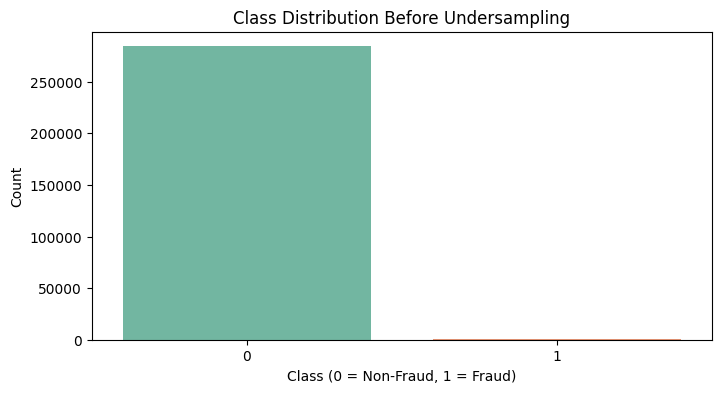

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before undersampling
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution Before Undersampling')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

/var/folders/q1/1vy1glm142x4n5mgsklbfh940000gn/T/ipykernel_95823/4290200941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=balanced_df, palette='Set1')


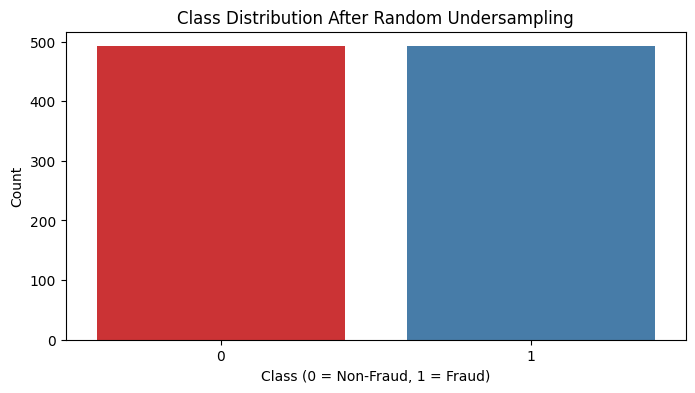

In [31]:
# Plot class distribution after undersampling
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=balanced_df, palette='Set1')
plt.title('Class Distribution After Random Undersampling')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

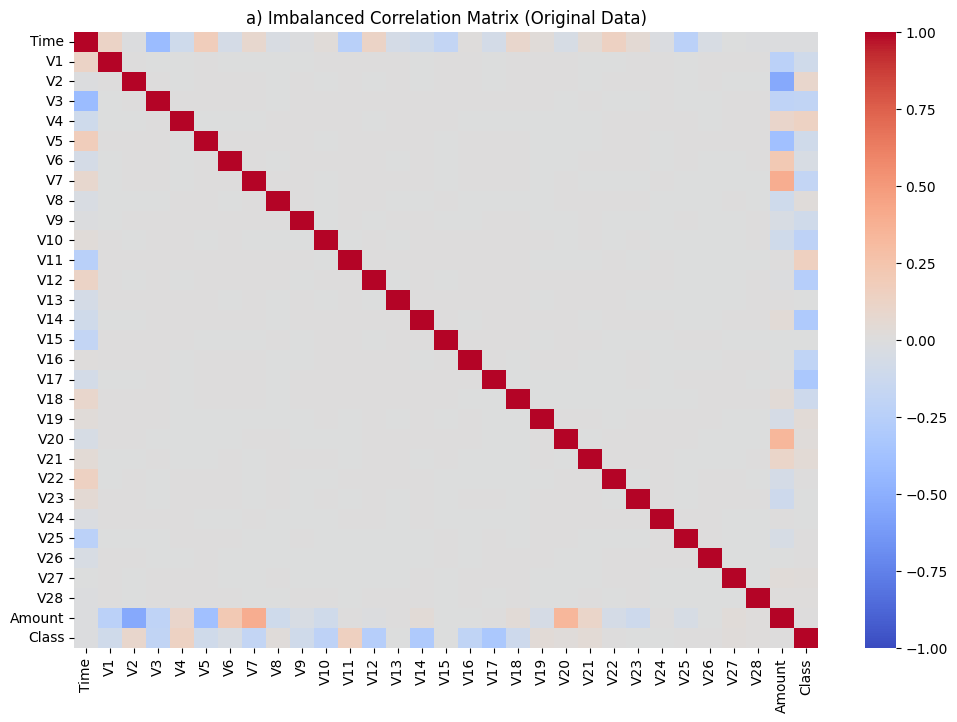

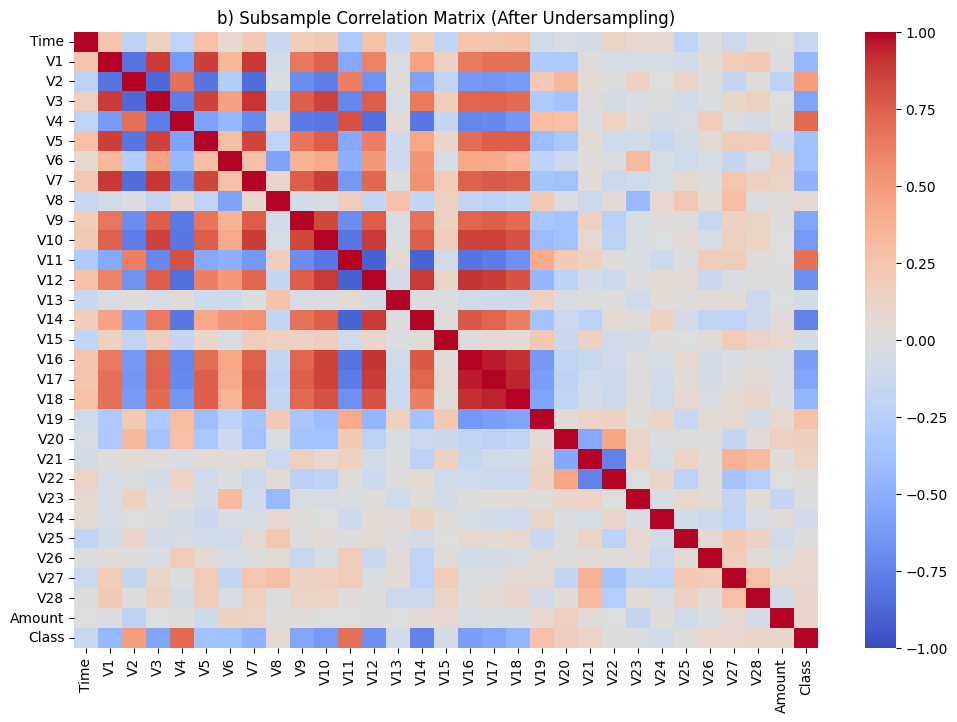

In [32]:
# c) Feature Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('a) Imbalanced Correlation Matrix (Original Data)')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(balanced_df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('b) Subsample Correlation Matrix (After Undersampling)')
plt.show()

# **Model** **Integration**


##Neural Networks


Epoch 1/20


/Users/rugved/Desktop/tawde project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6057 - loss: 0.9629 - precision: 0.5923 - recall: 0.5135 - val_accuracy: 0.8797 - val_loss: 0.3168 - val_precision: 0.8316 - val_recall: 0.9634
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8430 - loss: 0.3482 - precision: 0.8030 - recall: 0.9160 - val_accuracy: 0.9684 - val_loss: 0.2035 - val_precision: 0.9873 - val_recall: 0.9512
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.2899 - precision: 0.9560 - recall: 0.8276 - val_accuracy: 0.9620 - val_loss: 0.1675 - val_precision: 0.9872 - val_recall: 0.9390
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9207 - loss: 0.2068 - precision: 0.9746 - recall: 0.8544 - val_accuracy: 0.9620 - val_loss: 0.1536 - val_precision: 0.9750 - val_recall: 0.9512
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.1668 - precision: 0.9641 - recall: 0.9146 - val_accuracy: 0.9620 - val_loss: 0.1460 - val_precision

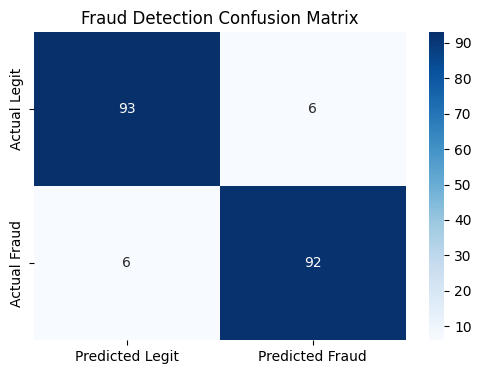

In [33]:
# Neural Network Implementation & Evaluation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Neural Network Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Class weights for imbalance handling (even after undersampling)
class_weight = {0: 1, 1: 1}  # Equal weights for 50/50 balanced data

# Model Training
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weight,
                    verbose=1)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Performance Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred,
      target_names=['Legitimate', 'Fraud']))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legit', 'Predicted Fraud'],
            yticklabels=['Actual Legit', 'Actual Fraud'])
plt.title('Fraud Detection Confusion Matrix')
plt.show()

##NN+SMORT


Class distribution after SMOTE:
Class
0    394
1    394
Name: count, dtype: int64
Epoch 1/20


/Users/rugved/Desktop/tawde project/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/rugved/Desktop/tawde project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.4502 - loss: 2.0154 - precision: 0.3607 - recall: 0.1778 - val_accuracy: 0.4747 - val_loss: 0.9208 - val_precision: 0.4800 - val_recall: 0.2963
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5339 - loss: 0.9615 - precision: 0.5470 - recall: 0.4885 - val_accuracy: 0.7025 - val_loss: 0.4645 - val_precision: 0.6393 - val_recall: 0.9630
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6574 - loss: 0.5780 - precision: 0.6158 - recall: 0.8337 - val_accuracy: 0.7025 - val_loss: 0.4220 - val_precision: 0.6349 - val_recall: 0.9877
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6890 - loss: 0.4673 - precision: 0.6207 - recall: 0.9556 - val_accuracy: 0.7152 - val_loss: 0.4038 - val_precision: 0.6452 - val_recall: 0.9877
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7187 - loss: 0.4413 - precision: 0.6436 - recall: 0.9479 - val_accuracy: 0.7785 - val_loss: 0.3805 - val_precision: 0.7

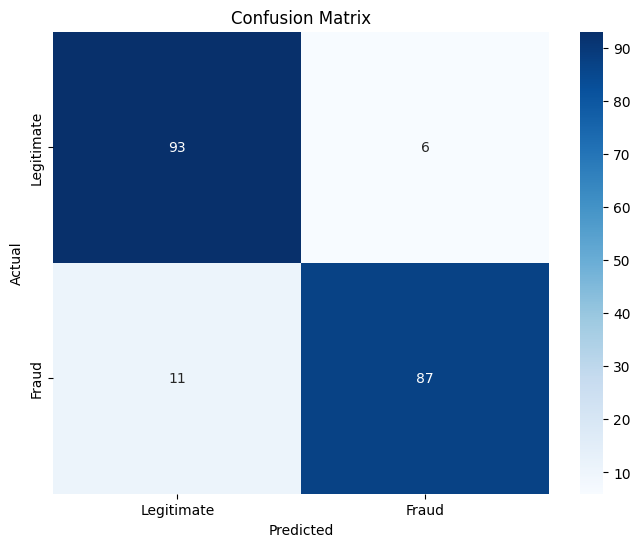

In [ ]:
# Import necessary libraries (ensure these are run in your environment)
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # <-- Added import for SMOTE

# SMOTE implementation


def apply_smote(X_train, y_train):
    """Applies SMOTE to the training data."""
    # Initialize SMOTE
    sm = SMOTE(random_state=42)
    # Fit and resample the training data
    X_res, y_res = sm.fit_resample(X_train, y_train)
    print("Class distribution after SMOTE:")
    # Use pandas Series to easily display value counts
    print(pd.Series(y_res).value_counts())
    return X_res, y_res

# Neural network architecture


def create_model(input_shape):
    """Creates and compiles the Keras Sequential model."""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Loss function for binary classification
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])
    return model

# Training and evaluation


def train_model(model, X_train, y_train, X_test, y_test):
    """Trains the model and evaluates it on the test set."""
    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=256,
                        validation_split=0.2,  # Use part of training data for validation
                        verbose=1)  # Show training progress

    # Make predictions on the test set
    y_pred_proba = model.predict(X_test)
    # Convert probabilities to binary predictions (0 or 1) using 0.5 threshold
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Print Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,
          target_names=['Legitimate', 'Fraud']))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Fraud'],
                yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return history

# --- Execute full workflow ---
# (Ensure X_train, y_train, X_test, y_test are defined earlier in your code)


# Apply SMOTE to the training data
X_train_smote, y_train_smote = apply_smote(X_train, y_train)

# Create the neural network model with the correct input shape
model = create_model(X_train_smote.shape[1])

# Train and evaluate the model using SMOTE'd training data and original test data
history = train_model(model, X_train_smote, y_train_smote, X_test, y_test)

##MLP


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# MLP Architecture
mlp_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train model
early_stop = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

history = mlp_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20


/Users/rugved/Desktop/tawde project/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5695 - loss: 0.6340 - val_accuracy: 0.7152 - val_loss: 0.4089
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6921 - loss: 0.4960 - val_accuracy: 0.8671 - val_loss: 0.3350
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8150 - loss: 0.3870 - val_accuracy: 0.9177 - val_loss: 0.2816
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8443 - loss: 0.3535 - val_accuracy: 0.9367 - val_loss: 0.2396
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9146 - loss: 0.2833 - val_accuracy: 0.9430 - val_loss: 0.2121
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9131 - loss: 0.2780 - val_accuracy: 0.9494 - val_loss: 0.1929
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9265 - loss: 0.2516 - val_accuracy: 0.9557 - val_loss: 0.1812
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9057 - loss: 0.2235 - val_accuracy: 0.9494 - val_loss: 0.1717
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


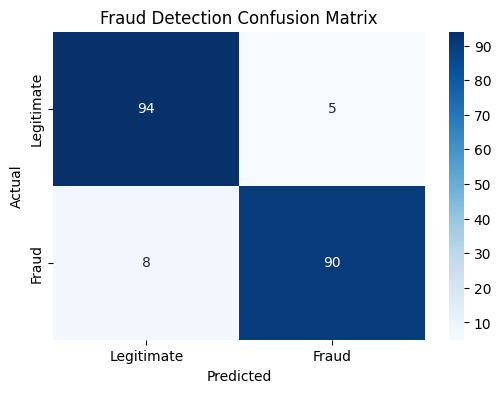


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9216    0.9495    0.9353        99
       Fraud     0.9474    0.9184    0.9326        98

    accuracy                         0.9340       197
   macro avg     0.9345    0.9339    0.9340       197
weighted avg     0.9344    0.9340    0.9340       197



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fraud Detection Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4,
      target_names=['Legitimate', 'Fraud']))

##Random Forest


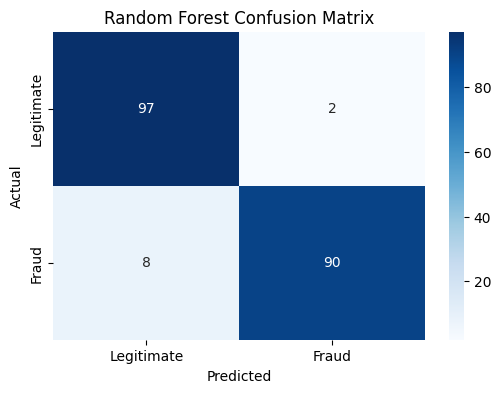


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9238    0.9798    0.9510        99
       Fraud     0.9783    0.9184    0.9474        98

    accuracy                         0.9492       197
   macro avg     0.9510    0.9491    0.9492       197
weighted avg     0.9509    0.9492    0.9492       197



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
rf_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred,
      digits=4, target_names=['Legitimate', 'Fraud']))

##Logistic Regression


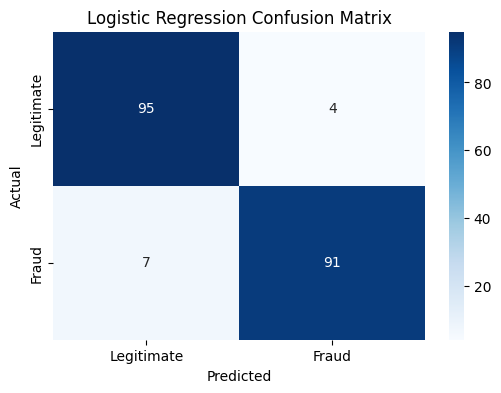


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9314    0.9596    0.9453        99
       Fraud     0.9579    0.9286    0.9430        98

    accuracy                         0.9442       197
   macro avg     0.9446    0.9441    0.9441       197
weighted avg     0.9446    0.9442    0.9441       197



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test data
logreg_pred = logreg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, logreg_pred,
      digits=4, target_names=['Legitimate', 'Fraud']))

##KNN


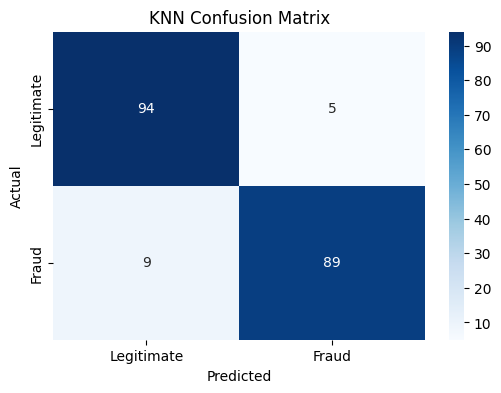


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.9126    0.9495    0.9307        99
       Fraud     0.9468    0.9082    0.9271        98

    accuracy                         0.9289       197
   macro avg     0.9297    0.9288    0.9289       197
weighted avg     0.9296    0.9289    0.9289       197



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
knn_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, knn_pred,
      digits=4, target_names=['Legitimate', 'Fraud']))

##SVM


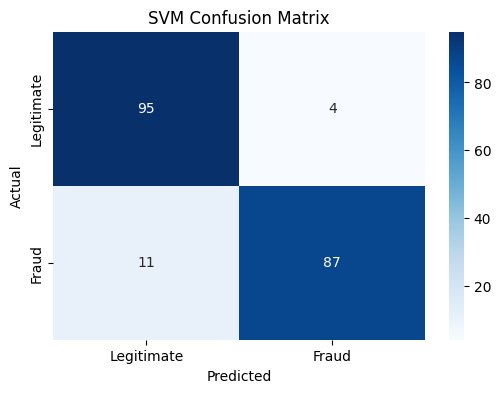


Classification Report:
              precision    recall  f1-score   support

  Legitimate     0.8962    0.9596    0.9268        99
       Fraud     0.9560    0.8878    0.9206        98

    accuracy                         0.9239       197
   macro avg     0.9261    0.9237    0.9237       197
weighted avg     0.9260    0.9239    0.9237       197



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM classifier (RBF kernel is default)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict on test data
svm_pred = svm.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_pred,
      digits=4, target_names=['Legitimate', 'Fraud']))

# **RESULTS**


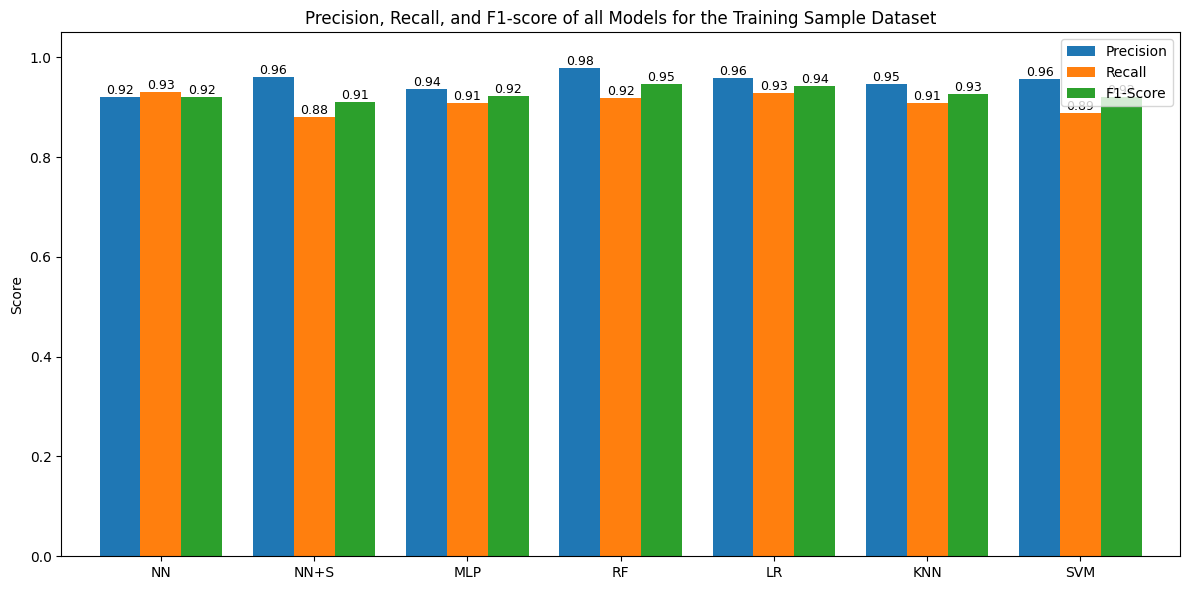

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example DataFrame structure; replace with your actual results
results_df = pd.DataFrame({
    'Precision':   [0.92, 0.96, 0.9368, 0.9783, 0.9579, 0.9468, 0.9560],
    'Recall':      [0.93, 0.88, 0.9082, 0.9184, 0.9286, 0.9082, 0.8878],
    'F1-Score':    [0.92, 0.91, 0.9223, 0.9474, 0.9430, 0.9271, 0.9206]
}, index=['NN', 'NN+S', 'MLP', 'RF', 'LR', 'KNN', 'SVM'])

# Plot grouped bar chart
ax = results_df.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title(
    'Precision, Recall, and F1-score of all Models for the Training Sample Dataset')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(title="", loc='upper right')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()